<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/team3/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils as np_utils
from keras.utils.np_utils import to_categorical
import numpy as np
# import keras

**Loading the Fashion MNIST dataset in Keras **

In [2]:
from tensorflow.keras.datasets import fashion_mnist

def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = fashion_mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

print(train_labels[0:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 3 0 2 7 2]


In [4]:
print(np.amax(train_samples))
print(np.amin(train_samples))

255
0


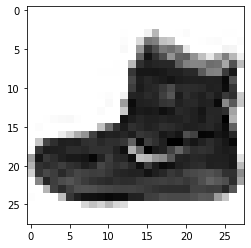

Label of image is 9


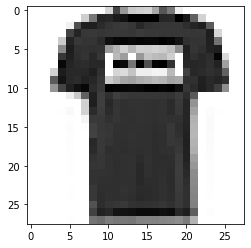

Label of image is 0


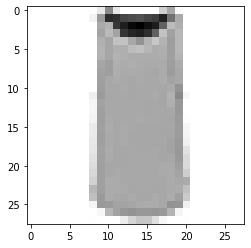

Label of image is 0


In [5]:
for i in range(0,3):
  pixels=train_samples[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", train_labels[i])

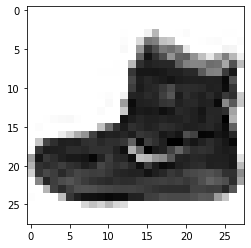

Label of image is Ankle boot


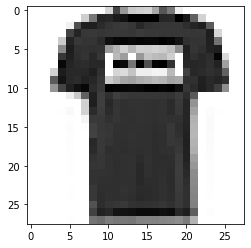

Label of image is T-shirt/top


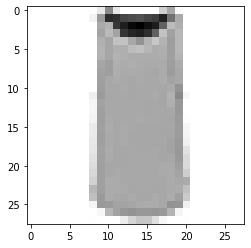

Label of image is T-shirt/top


In [6]:
df=[]
for i in train_labels:
    if i == 0:
        df.append('T-shirt/top')
    elif i==1:
        df.append('Trouser')
    elif i==2:
        df.append('Pullover')
    elif i==3:
        df.append('Dress')
    elif i==4:
        df.append('Coat')
    elif i==5:
        df.append('Sandal')
    elif i==6:
        df.append('Shirt')
    elif i==7:
        df.append('Sneaker')
    elif i==8:
        df.append('Bag')
    elif i==9:
        df.append('Ankle boot')
    
for i in range(0,3):
  pixels=train_samples[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", df[i])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


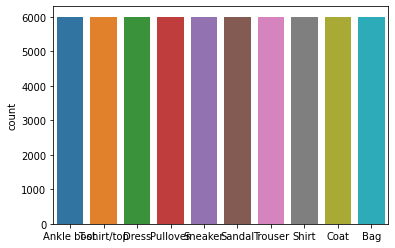

In [7]:
 sns.countplot(df)

In [8]:
train_labels=np_utils.to_categorical(train_labels)
test_labels=np_utils.to_categorical(test_labels)
train_samples=train_samples/255.0
test_samples=test_samples/255.0

**The network architecture**

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  




**COMPLITION STEP**

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       2

**"Fitting" the model**


In [11]:
history=model.fit(train_samples,train_labels,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 14s 9ms/step - loss: 0.8071 - accuracy: 0.7234 - val_loss: 1.4725 - val_accuracy: 0.5543
Epoch 2/50
375/375 [==============================] - 3s 8ms/step - loss: 0.5117 - accuracy: 0.8161 - val_loss: 0.4243 - val_accuracy: 0.8467
Epoch 3/50
375/375 [==============================] - 3s 8ms/step - loss: 0.4335 - accuracy: 0.8428 - val_loss: 0.3711 - val_accuracy: 0.8661
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3991 - accuracy: 0.8545 - val_loss: 0.3594 - val_accuracy: 0.8658
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3743 - accuracy: 0.8643 - val_loss: 0.3155 - val_accuracy: 0.8836
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3599 - accuracy: 0.8678 - val_loss: 0.3240 - val_accuracy: 0.8817
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3465 - accuracy: 0.8737 - val_loss: 0.3111 - val_accuracy: 0.8893
Epoch

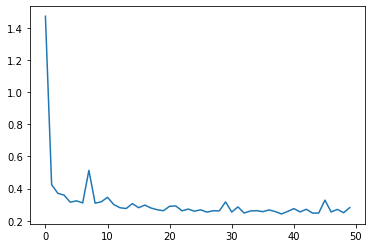

In [12]:
history.history.keys()

plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.show()

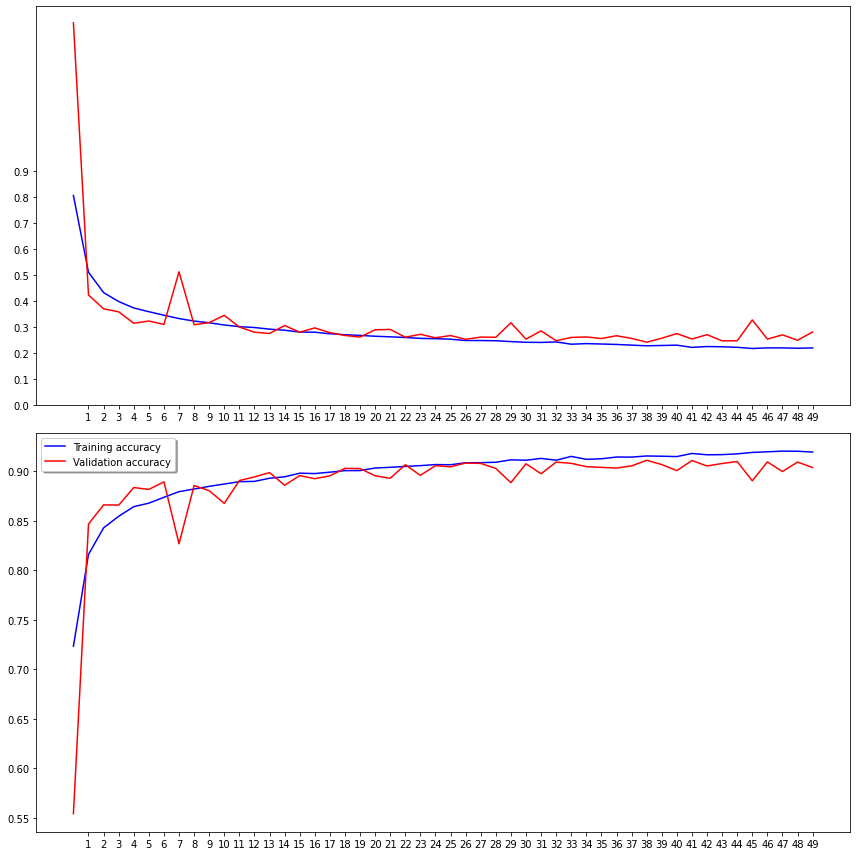

In [13]:
epochs=50
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

**Evaluating**

In [14]:
model.evaluate(test_samples,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3008 - accuracy: 0.9007


[0.30080968141555786, 0.9006999731063843]